# Exploratory Data Analysis

## Descriptive Statistics :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [113]:
df_eur = pd.read_parquet("C:/Users/pc/Desktop/data/fbref final dataset.parquet")

value_to_remove = 'Rk'  

# Remove repeated header

df_eur = df_eur[~df_eur.eq(value_to_remove).any(axis=1)]

# Convert data type

df_eur['Rk'] = df_eur['Rk'].astype(int)
df_eur['Player'] = df_eur['Player'].astype(str)
df_eur['Nation'] = df_eur['Nation'].astype(str)
df_eur['Pos'] = df_eur['Pos'].astype(str)
df_eur['Squad'] = df_eur['Squad'].astype(str)
#df_eur['Age'] = df_eur['Age'][0:1].astype(int)
df_eur['Age'] = pd.to_numeric(df_eur['Age'].str[:2], errors='coerce')

#df_eur['Born'] = df_eur['Born'].astype(int)
df_eur['Born'] = pd.to_numeric(df_eur['Born'], errors='coerce')

df_eur['90s'] = df_eur['90s'].astype(float)
df_eur['Gls'] = df_eur['Gls'].astype(int)
df_eur['Sh'] = df_eur['Sh'].astype(int)
df_eur['SoT'] = df_eur['SoT'].astype(int)
df_eur['SoT%'] = df_eur['SoT%'].astype(float)
df_eur['Sh/90'] = df_eur['Sh/90'].astype(float)
df_eur['SoT/90'] = df_eur['SoT/90'].astype(float)
df_eur['G/Sh'] = df_eur['G/Sh'].astype(float)
df_eur['G/SoT'] = df_eur['G/SoT'].astype(float)
df_eur['Dist'] = df_eur['Dist'].astype(float)
#df_eur['FK'] = df_eur['FK'].astype(int)
df_eur['FK'] = pd.to_numeric(df_eur['FK'], errors='coerce')

#df_eur['PK'] = df_eur['PK'].astype(int)
df_eur['PK'] = pd.to_numeric(df_eur['PK'], errors='coerce')

#df_eur['PKatt'] = df_eur['PKatt'].astype(int)
df_eur['PKatt'] = pd.to_numeric(df_eur['PKatt'], errors='coerce')

df_eur['xG'] = df_eur['xG'].astype(float)
df_eur['npxG'] = df_eur['npxG'].astype(float)
df_eur['npxG/Sh'] = df_eur['npxG/Sh'].astype(float)
df_eur['G-xG'] = df_eur['G-xG'].astype(float)
df_eur['np:G-xG'] = df_eur['np:G-xG'].astype(float)
#df_eur['Cmp'] = df_eur['Cmp'].astype(int)
df_eur['Cmp'] = pd.to_numeric(df_eur['Cmp'], errors='coerce')

#df_eur['Att'] = df_eur['Att'].astype(int)
df_eur['Att'] = pd.to_numeric(df_eur['Att'], errors='coerce')

df_eur['Cmp%'] = df_eur['Cmp%'].astype(float)
#df_eur['TotDist'] = df_eur['TotDist'].astype(int)
df_eur['TotDist'] = pd.to_numeric(df_eur['TotDist'], errors='coerce')

#df_eur['PrgDist'] = df_eur['PrgDist'].astype(int)
df_eur['PrgDist'] = pd.to_numeric(df_eur['PrgDist'], errors='coerce')

#df_eur['Cmp.1'] = df_eur['Cmp.1'].astype(int)
df_eur['Cmp.1'] = pd.to_numeric(df_eur['Cmp.1'], errors='coerce')

#df_eur['Att.1'] = df_eur['Att.1'].astype(int)
df_eur['Att.1'] = pd.to_numeric(df_eur['Att.1'], errors='coerce')

df_eur['Cmp%.1'] = df_eur['Cmp%.1'].astype(float)
#df_eur['Cmp.2'] = df_eur['Cmp.2'].astype(int)
df_eur['Cmp.2'] = pd.to_numeric(df_eur['Cmp.2'], errors='coerce')

#df_eur['Att.2'] = df_eur['Att.2'].astype(int)
df_eur['Att.2'] = pd.to_numeric(df_eur['Att.2'], errors='coerce')

df_eur['Cmp%.2'] = df_eur['Cmp%.2'].astype(float)
#df_eur['Cmp.3'] = df_eur['Cmp.3'].astype(int)
df_eur['Cmp.3'] = pd.to_numeric(df_eur['Cmp.3'], errors='coerce')

#df_eur['Att.3'] = df_eur['Att.3'].astype(int)
df_eur['Att.3'] = pd.to_numeric(df_eur['Att.3'], errors='coerce')

df_eur['Cmp%.3'] = df_eur['Cmp%.3'].astype(float)
df_eur['Ast'] = df_eur['Ast'].astype(int)
df_eur['xAG'] = df_eur['xAG'].astype(float)
df_eur['xA'] = df_eur['xA'].astype(float)
df_eur['A-xAG'] = df_eur['A-xAG'].astype(float)
#df_eur['KP'] = df_eur['KP'].astype(int)
df_eur['KP'] = pd.to_numeric(df_eur['KP'], errors='coerce')

#df_eur['1/3'] = df_eur['1/3'].astype(int)
df_eur['1/3'] = pd.to_numeric(df_eur['1/3'], errors='coerce')

###df_eur['PPA'] = df_eur['PPA'].astype(int)
df_eur['PPA'] = pd.to_numeric(df_eur['PPA'], errors='coerce')

###df_eur['CrsPA'] = df_eur['CrsPA'].astype(int)
df_eur['CrsPA'] = pd.to_numeric(df_eur['CrsPA'], errors='coerce')

###df_eur['PrgP'] = df_eur['PrgP'].astype(int)
df_eur['PrgP'] = pd.to_numeric(df_eur['PrgP'], errors='coerce')

###df_eur['Tkl'] = df_eur['Tkl'].astype(int)
df_eur['Tkl'] = pd.to_numeric(df_eur['Tkl'], errors='coerce')

df_eur['TklW'] = df_eur['TklW'].astype(int)


###df_eur['Def 3rd'] = df_eur['Def 3rd'].astype(int)
df_eur['Def 3rd'] = pd.to_numeric(df_eur['Def 3rd'], errors='coerce')

###df_eur['Mid 3rd'] = df_eur['Mid 3rd'].astype(int)
df_eur['Mid 3rd'] = pd.to_numeric(df_eur['Mid 3rd'], errors='coerce')

###df_eur['Att 3rd'] = df_eur['Att 3rd'].astype(int)
df_eur['Att 3rd'] = pd.to_numeric(df_eur['Att 3rd'], errors='coerce')

###df_eur['Tkl.1'] = df_eur['Tkl.1'].astype(int)
df_eur['Tkl.1'] = pd.to_numeric(df_eur['Tkl.1'], errors='coerce')

df_eur['Tkl%'] = df_eur['Tkl%'].astype(float)
###df_eur['Lost'] = df_eur['Lost'].astype(int)
df_eur['Lost'] = pd.to_numeric(df_eur['Lost'], errors='coerce')

###df_eur['Blocks'] = df_eur['Blocks'].astype(int)
df_eur['Blocks'] = pd.to_numeric(df_eur['Blocks'], errors='coerce')

###df_eur['Pass'] = df_eur['Pass'].astype(int)
df_eur['Pass'] = pd.to_numeric(df_eur['Pass'], errors='coerce')

df_eur['Int'] = df_eur['Int'].astype(int)


###df_eur['Tkl+Int'] = df_eur['Tkl+Int'].astype(int)
df_eur['Tkl+Int'] = pd.to_numeric(df_eur['Tkl+Int'], errors='coerce')

###df_eur['Clr'] = df_eur['Clr'].astype(int)
df_eur['Clr'] = pd.to_numeric(df_eur['Clr'], errors='coerce')

###df_eur['Err'] = df_eur['Err'].astype(int)
df_eur['Err'] = pd.to_numeric(df_eur['Err'], errors='coerce')

df_eur['season'] = df_eur['season'].astype(str)






df_eur.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,Clr,Err,season
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,19.7,0,18,...,19.0,44.2,24.0,18.0,12.0,30,65.0,40.0,2.0,2020-2021
1,2,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,11.6,6,32,...,1.0,14.3,6.0,6.0,6.0,5,12.0,17.0,0.0,2020-2021
2,3,Che Adams,sct SCO,FW,Southampton,24.0,1996.0,29.6,9,55,...,6.0,35.3,11.0,20.0,18.0,4,29.0,19.0,1.0,2020-2021
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,22.0,1997.0,32.8,0,18,...,19.0,47.5,21.0,26.0,6.0,42,79.0,197.0,2.0,2020-2021
4,5,Adrián,es ESP,GK,Liverpool,33.0,1987.0,3.0,0,0,...,0.0,NaN,0.0,0.0,0.0,0,0.0,3.0,1.0,2020-2021


In [4]:
df_eur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17785 entries, 0 to 18481
Data columns (total 64 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rk       17785 non-null  int32  
 1   Player   17785 non-null  object 
 2   Nation   17785 non-null  object 
 3   Pos      17785 non-null  object 
 4   Squad    17785 non-null  object 
 5   Age      17774 non-null  float64
 6   Born     17774 non-null  float64
 7   90s      17785 non-null  float64
 8   Gls      17785 non-null  int32  
 9   Sh       17785 non-null  int32  
 10  SoT      17785 non-null  int32  
 11  SoT%     14365 non-null  float64
 12  Sh/90    17785 non-null  float64
 13  SoT/90   17785 non-null  float64
 14  G/Sh     14365 non-null  float64
 15  G/SoT    11833 non-null  float64
 16  Dist     14330 non-null  float64
 17  FK       17735 non-null  float64
 18  PK       17785 non-null  int64  
 19  PKatt    17785 non-null  int64  
 20  xG       17735 non-null  float64
 21  npxG     177

In [5]:
df_eur.describe()

,Rk,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,Mid 3rd,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,Clr,Err
count,17785.000000,17774.000000,17774.000000,17785.000000,17785.000000,17785.000000,17785.000000,14365.000000,17785.000000,17785.000000,...,17735.000000,17735.000000,15506.000000,17735.000000,17735.000000,17735.000000,17785.000000,17735.000000,17735.000000,17735.000000
mean,301.679280,25.191178,1996.016597,12.223576,1.454428,13.393815,4.459151,29.952189,1.275317,0.407013,...,7.141133,8.300310,43.301902,9.985340,11.821257,8.418776,11.595333,29.588610,20.685932,0.310685
std,179.745052,4.612811,4.647975,10.778281,2.918438,18.027588,7.002934,21.512176,2.948316,1.109336,...,8.679570,9.898352,24.018611,11.367474,12.598625,9.236064,14.776005,33.327953,30.363072,0.720032
min,1.000000,15.000000,1977.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,149.000000,22.000000,1993.000000,2.800000,0.000000,1.000000,0.000000,16.700000,0.270000,0.000000,...,1.000000,1.000000,29.200000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,0.000000
50%,297.000000,25.000000,1996.000000,9.200000,0.000000,7.000000,2.000000,30.000000,0.820000,0.180000,...,4.000000,5.000000,44.000000,6.000000,8.000000,5.000000,5.000000,17.000000,9.000000,0.000000
75%,445.000000,28.000000,2000.000000,19.900000,2.000000,18.000000,6.000000,40.500000,1.820000,0.570000,...,11.000000,12.000000,57.400000,15.000000,19.000000,13.000000,17.000000,46.000000,26.000000,0.000000
max,751.000000,42.000000,2008.000000,46.000000,43.000000,191.000000,85.000000,100.000000,180.000000,90.000000,...,69.000000,74.000000,100.000000,108.000000,99.000000,65.000000,113.000000,216.000000,248.000000,8.000000


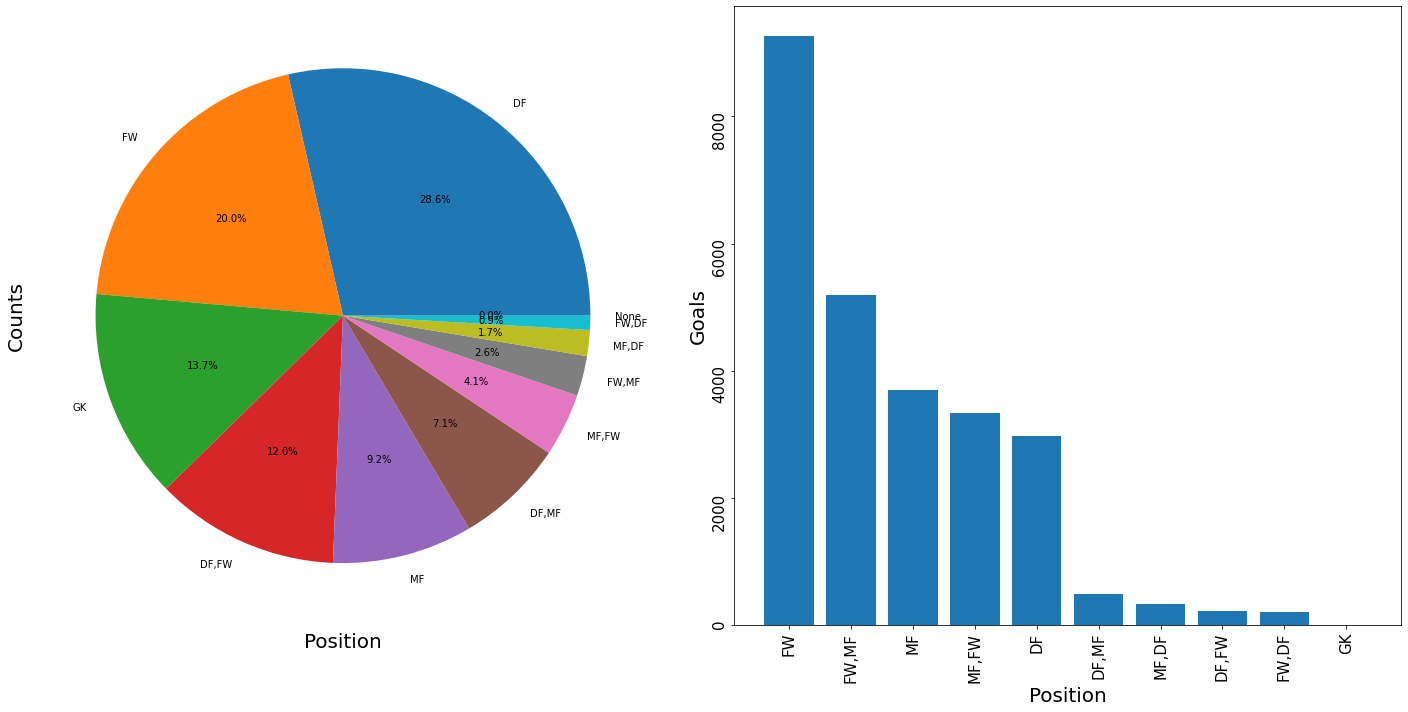

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

# Specify the features of interest
num_features = ['Position', 'Position']
xaxes = num_features
yaxes = ['Counts', 'Goals']

goals_per_squad = df_eur.dropna().groupby('Pos')['Gls'].sum()
goals_per_squad = goals_per_squad.sort_values(ascending=False)


# draw pie chart
axes[0].pie(df_eur['Pos'].dropna().value_counts(), labels=df_eur['Pos'].dropna().unique(), autopct='%1.1f%%')
axes[0].set_xlabel(xaxes[0], fontsize=20)
axes[0].set_ylabel(yaxes[0], fontsize=20)

# draw 2D histogram (hist2d)
axes[1].bar(goals_per_squad.index, goals_per_squad.values)
axes[1].set_xlabel(xaxes[1], fontsize=20)
axes[1].set_ylabel(yaxes[1], fontsize=20)
axes[1].tick_params(axis='both', labelsize=15, rotation=90)


plt.tight_layout()
plt.show()


## Correlation Analysis :

In [8]:
limited_df_eur = df_eur[:3]  # Select the first 100 rows of the DataFrame

limited_df_eur.corr()

,Rk,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,...,Mid 3rd,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,Clr,Err
Rk,1.000000,-0.693375,0.792406,0.549086,0.981981,0.990282,0.976221,0.998171,0.510713,0.821995,...,-0.132068,-0.699559,-0.289853,-0.699559,0.132068,0.500000,-0.882498,-0.665148,-0.824110,-0.500000
Age,-0.693375,1.000000,-0.988982,0.221511,-0.817057,-0.586425,-0.520683,-0.648548,-0.973633,-0.980316,...,0.805837,0.999963,0.890620,0.999963,0.622693,0.277350,0.950801,0.999260,0.979573,0.970725
Born,0.792406,-0.988982,1.000000,-0.074714,0.893405,0.699872,0.641330,0.754082,0.929135,0.998742,...,-0.709302,-0.990221,-0.813489,-0.990221,-0.500000,-0.132068,-0.986187,-0.982557,-0.998548,-0.924473
90s,0.549086,0.221511,-0.074714,1.000000,0.381246,0.659981,0.717204,0.598604,-0.438125,-0.024619,...,0.755929,0.213100,0.640734,0.213100,0.900962,0.998337,-0.091492,0.258853,0.020895,0.449252
Gls,0.981981,-0.817057,0.893405,0.381246,1.000000,0.946156,0.917663,0.968761,0.663988,0.914807,...,-0.317015,-0.821995,-0.465499,-0.821995,-0.057639,0.327327,-0.955477,-0.794277,-0.916305,-0.654654
Sh,0.990282,-0.586425,0.699872,0.659981,0.946156,1.000000,0.996882,0.996878,0.386183,0.734806,...,0.007069,-0.593383,-0.153934,-0.593383,0.268638,0.615581,-0.808514,-0.554837,-0.737328,-0.374701
SoT,0.976221,-0.520683,0.641330,0.717204,0.917663,0.996882,1.000000,0.987540,0.312194,0.678995,...,0.085951,-0.528020,-0.075489,-0.528020,0.343806,0.675845,-0.759558,-0.487461,-0.681725,-0.300376
SoT%,0.998171,-0.648548,0.754082,0.598604,0.968761,0.996878,0.987540,1.000000,0.457807,0.786065,...,-0.071905,-0.655083,-0.231467,-0.655083,0.191747,0.551437,-0.852453,-0.618792,-0.788362,-0.446734
Sh/90,0.510713,-0.973633,0.929135,-0.438125,0.663988,0.386183,0.312194,0.457807,1.000000,0.909428,...,-0.919669,-0.971631,-0.970875,-0.971631,-0.784772,-0.489210,-0.855059,-0.981686,-0.907872,-0.999923
SoT/90,0.821995,-0.980316,0.998742,-0.024619,0.914807,0.734806,0.678995,0.786065,0.909428,1.000000,...,-0.673065,-0.981981,-0.783304,-0.981981,-0.455947,-0.082199,-0.993252,-0.971997,-0.999993,-0.904194


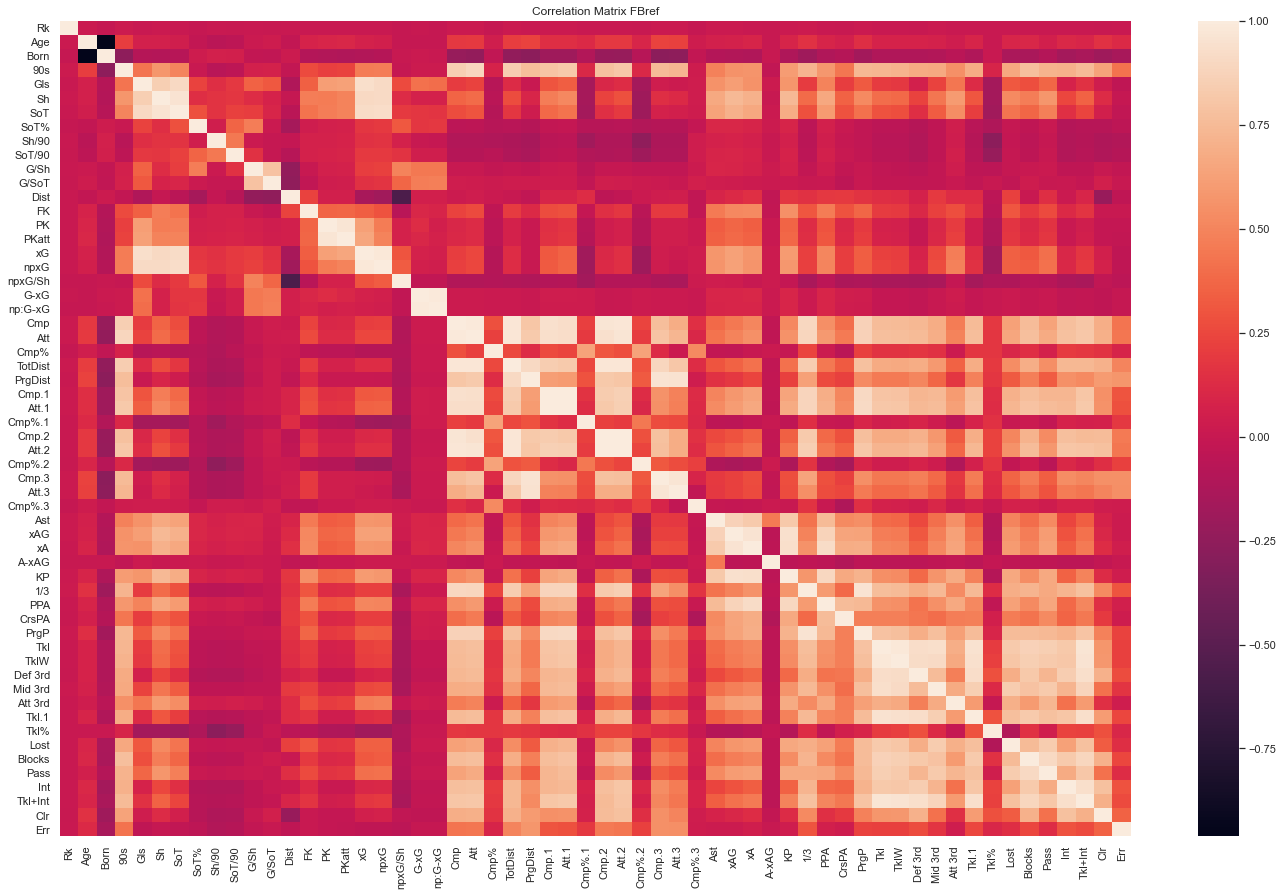

In [144]:
plt.figure(figsize=(24, 15))
sns.heatmap(df_eur.corr())
plt.title("Correlation Matrix FBref")
plt.show()

#### Missing data :

In [10]:
df_eur.isnull()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,Clr,Err,season
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,True,True,True,False
18478,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
18479,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18480,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df_eur.isnull().sum()

Rk          0
Player      0
Nation      0
Pos         0
Squad       0
           ..
Int         0
Tkl+Int    50
Clr        50
Err        50
season      0
Length: 64, dtype: int64

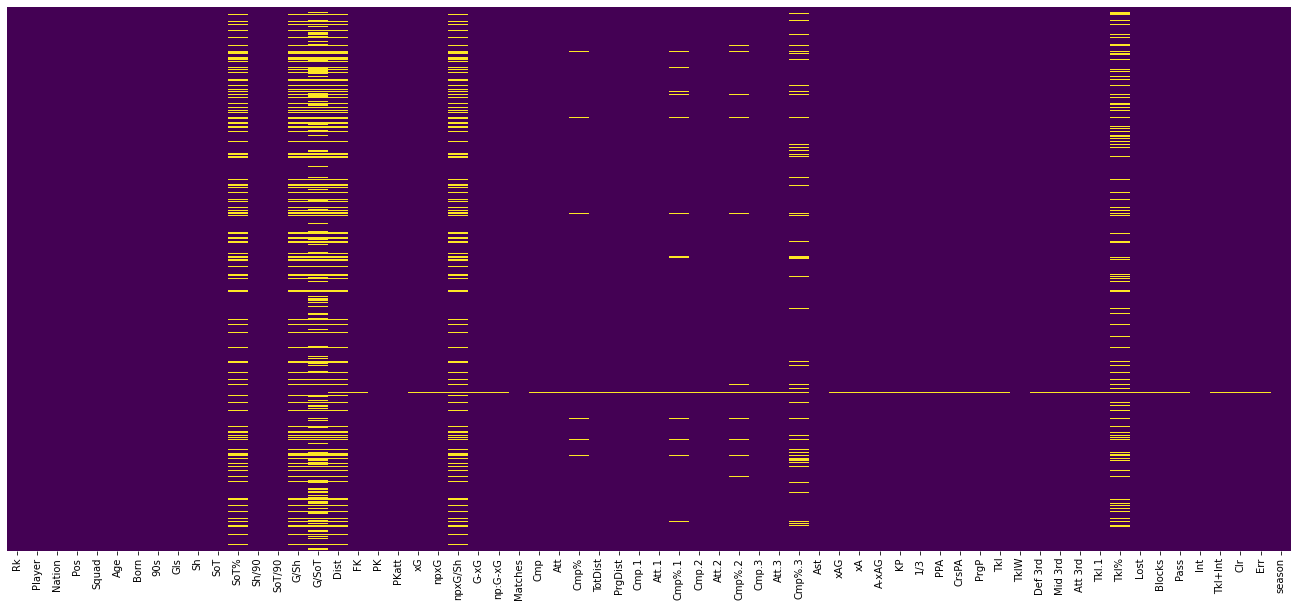

In [12]:
plt.figure(figsize=(23, 10))

sns.heatmap(df_eur.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.show()

## Feature Importance & Selection:

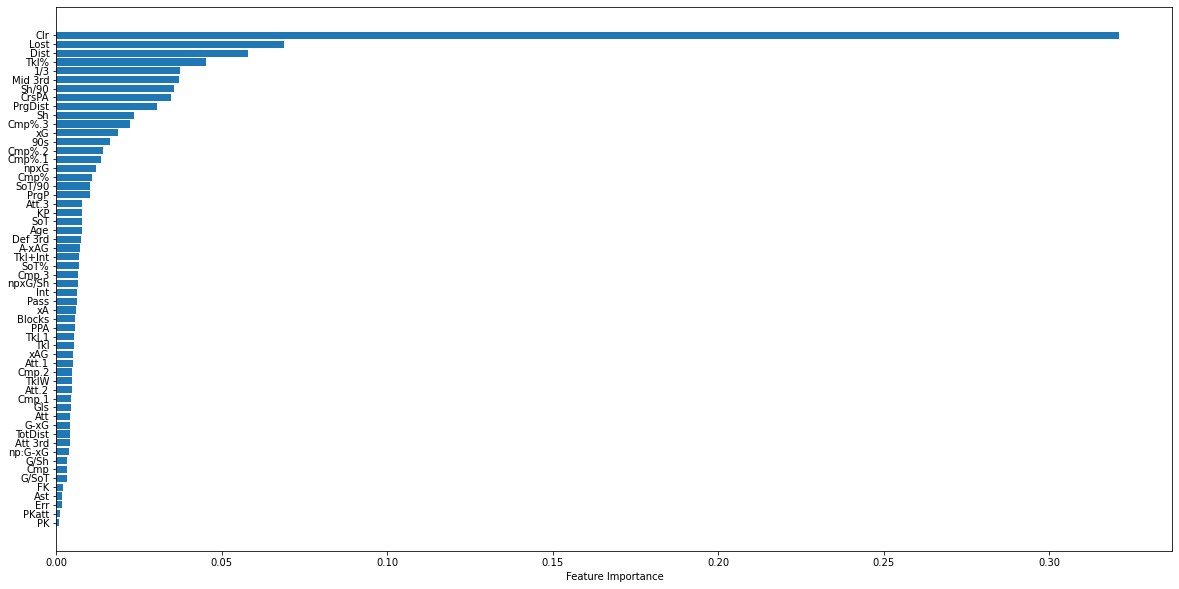

In [13]:
df_eur_cleaned = df_eur.dropna()

features = ['Age', '90s', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'Gls', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Tkl%', 'Lost', 'Blocks', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err']

X = df_eur_cleaned[features]

# Convert categorical target variable to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_eur_cleaned['Pos'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(np.array(features)[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()

## Dataset Cleaning and Filtering:

- first we are going to find the missing values which we can extract from other perimeters :

In [14]:
# Calculate SoT%
for index, row in df_eur.iterrows():
    if pd.isna(row['SoT%']) and row['Sh'] != 0:
        df_eur.at[index, 'SoT%'] = row['SoT'] / row['Sh'] * 100
    elif pd.isna(row['SoT%']) and row['Sh'] == 0:
        df_eur.at[index, 'SoT%'] = 0
        
# Calculate G/Sh
for index, row in df_eur.iterrows():
    if pd.isna(row['G/Sh']):
        if row['Sh'] != 0:
            df_eur.at[index, 'G/Sh'] = row['Gls'] / row['Sh']
        else:
            df_eur.at[index, 'G/Sh'] = 0


# Calculate G/SoT
for index, row in df_eur.iterrows():
    if pd.isna(row['G/SoT']):
        if row['SoT'] != 0:
            df_eur.at[index, 'G/SoT'] = row['Gls'] / row['SoT']
        else:
            df_eur.at[index, 'G/SoT'] = 0


# calculate Dist


# Calculate npxG/Sh
for index, row in df_eur.iterrows():
    if pd.isna(row['npxG/Sh']):
        if row['Sh'] != 0:
            df_eur.at[index, 'npxG/Sh'] = row['npxG'] / row['Sh']
        else:
            df_eur.at[index, 'npxG/Sh'] = 0

# calculate Cmp%
for index, row in df_eur.iterrows():
    if pd.isna(row['Cmp%']):
        if row['Att'] != 0:
            df_eur.at[index, 'Cmp%'] = row['Cmp'] / row['Att'] * 100
        else:
            df_eur.at[index, 'Cmp%'] = 0

# calculate Cmp%.1
for index, row in df_eur.iterrows():
    if pd.isna(row['Cmp%.1']):
        if row['Att.1'] != 0:
            df_eur.at[index, 'Cmp%.1'] = row['Cmp.1'] / row['Att.1'] * 100
        else:
            df_eur.at[index, 'Cmp%.1'] = 0

# calculate Cmp%.2
for index, row in df_eur.iterrows():
    if pd.isna(row['Cmp%.2']):
        if row['Att.2'] != 0:
            df_eur.at[index, 'Cmp%.2'] = row['Cmp.2'] / row['Att.2'] * 100
        else:
            df_eur.at[index, 'Cmp%.2'] = 0

# calculate Cmp%.3
for index, row in df_eur.iterrows():
    if pd.isna(row['Cmp%.3']):
        if row['Att.3'] != 0:
            df_eur.at[index, 'Cmp%.3'] = row['Cmp.3'] / row['Att.3'] * 100
        else:
            df_eur.at[index, 'Cmp%.3'] = 0


# calculate Tkl%
for index, row in df_eur.iterrows():
    if pd.isna(row['Tkl%']) and row['Tkl'] + row['Lost'] != 0:
        df_eur.at[index, 'Tkl%'] = (row['Tkl'] / (row['Tkl'] + row['Lost'])) * 100
    elif pd.isna(row['Tkl%']) and row['Tkl'] + row['Lost'] == 0:
        df_eur.at[index, 'Tkl%'] = 0



- Next we are going to remove players with missing data :

In [15]:
df_eur = df_eur[df_eur['Att.2'].notna()]

- finally we are going to remove the duplicated players :

In [16]:
df_eur = df_eur.drop_duplicates()

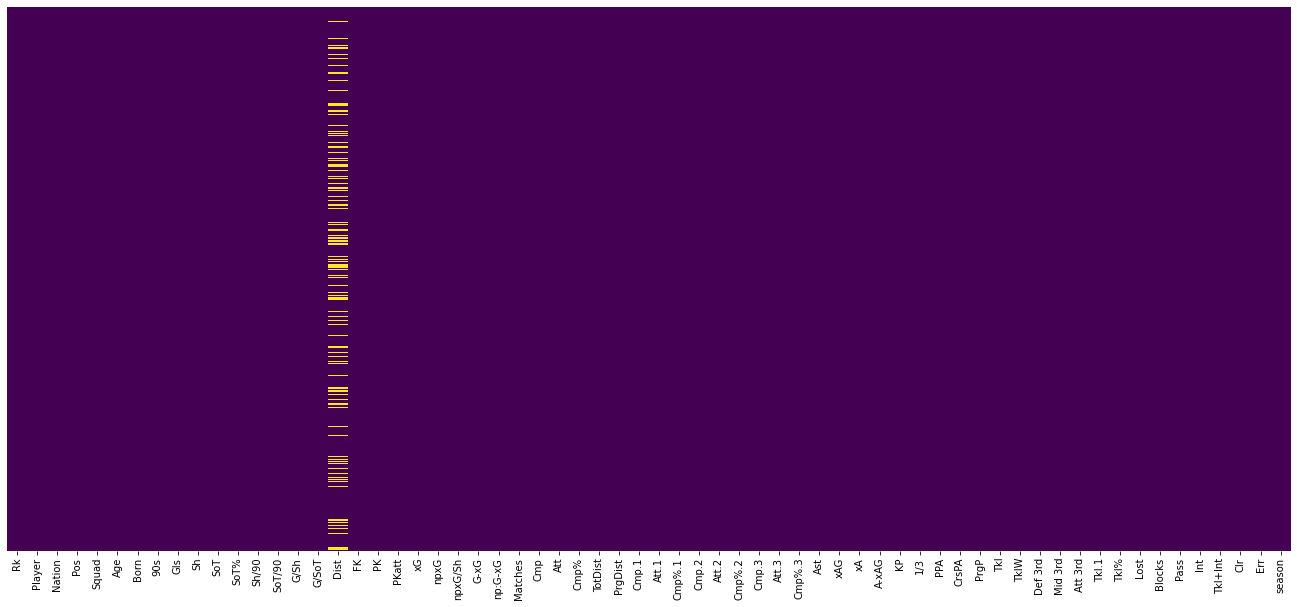

In [17]:
plt.figure(figsize=(23, 10))

sns.heatmap(df_eur.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.show()

In [18]:
df_eur

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Tkl.1,Tkl%,Lost,Blocks,Pass,Int,Tkl+Int,Clr,Err,season
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,19.7,0,18,...,19.0,44.2,24.0,18.0,12.0,30,65.0,40.0,2.0,2020-2021
1,2,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,11.6,6,32,...,1.0,14.3,6.0,6.0,6.0,5,12.0,17.0,0.0,2020-2021
2,3,Che Adams,sct SCO,FW,Southampton,24.0,1996.0,29.6,9,55,...,6.0,35.3,11.0,20.0,18.0,4,29.0,19.0,1.0,2020-2021
3,4,Tosin Adarabioyo,eng ENG,DF,Fulham,22.0,1997.0,32.8,0,18,...,19.0,47.5,21.0,26.0,6.0,42,79.0,197.0,2.0,2020-2021
4,5,Adrián,es ESP,GK,Liverpool,33.0,1987.0,3.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,3.0,1.0,2020-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18476,576,Zaydou Youssouf,fr FRA,MF,Famalicão,23.0,1999.0,23.8,2,24,...,33.0,50.8,32.0,26.0,23.0,33,112.0,29.0,1.0,2022-2023
18478,578,Ivan Zlobin,ru RUS,GK,Famalicão,26.0,1997.0,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,2022-2023
18479,579,Kévin Zohi,ml MLI,"FW,MF",Vizela,26.0,1996.0,10.0,2,26,...,8.0,53.3,7.0,11.0,11.0,5,23.0,8.0,0.0,2022-2023
18480,580,Nermin Zolotić,ba BIH,DF,Casa Pia,29.0,1993.0,24.3,0,6,...,22.0,51.2,21.0,39.0,21.0,37,68.0,90.0,2.0,2022-2023


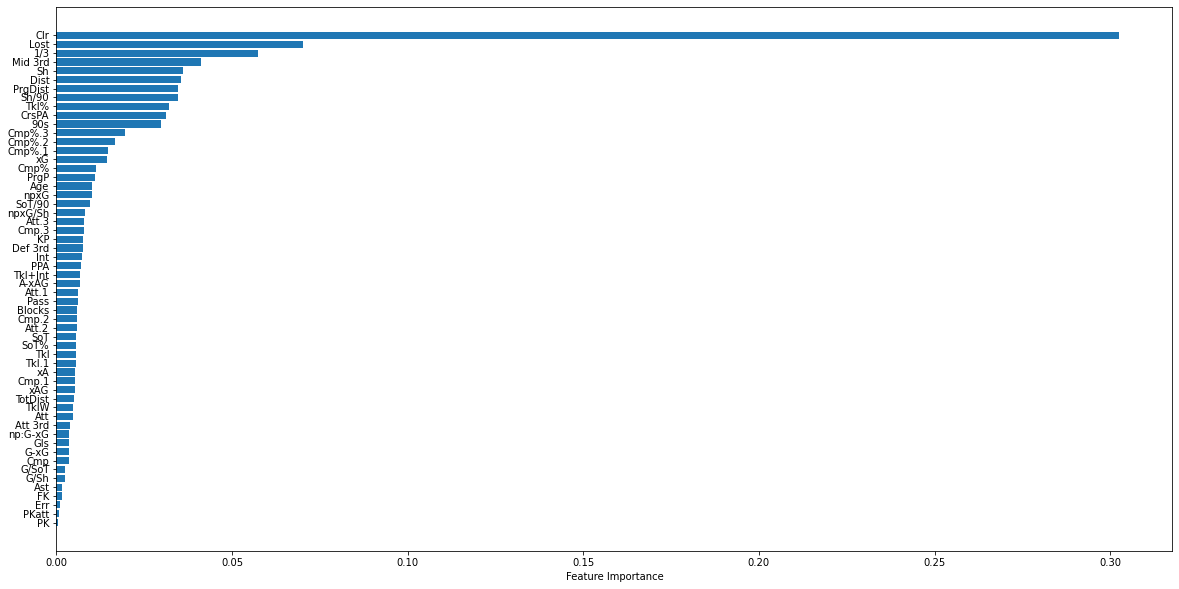

In [19]:
df_eur_cleaned = df_eur.dropna()

features = ['Age', '90s', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'Gls', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Tkl%', 'Lost', 'Blocks', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err']

X = df_eur_cleaned[features]

# Convert categorical target variable to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_eur_cleaned['Pos'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

sort = rf.feature_importances_.argsort()
plt.barh(np.array(features)[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")
plt.show()

## Plotting Use Cases:

### A comparative analysis of Folarin Balogun, Jonathan David, and Louis Openda.

- First we are going to do a comparaison between the three players concidering the offencive metrics :

C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


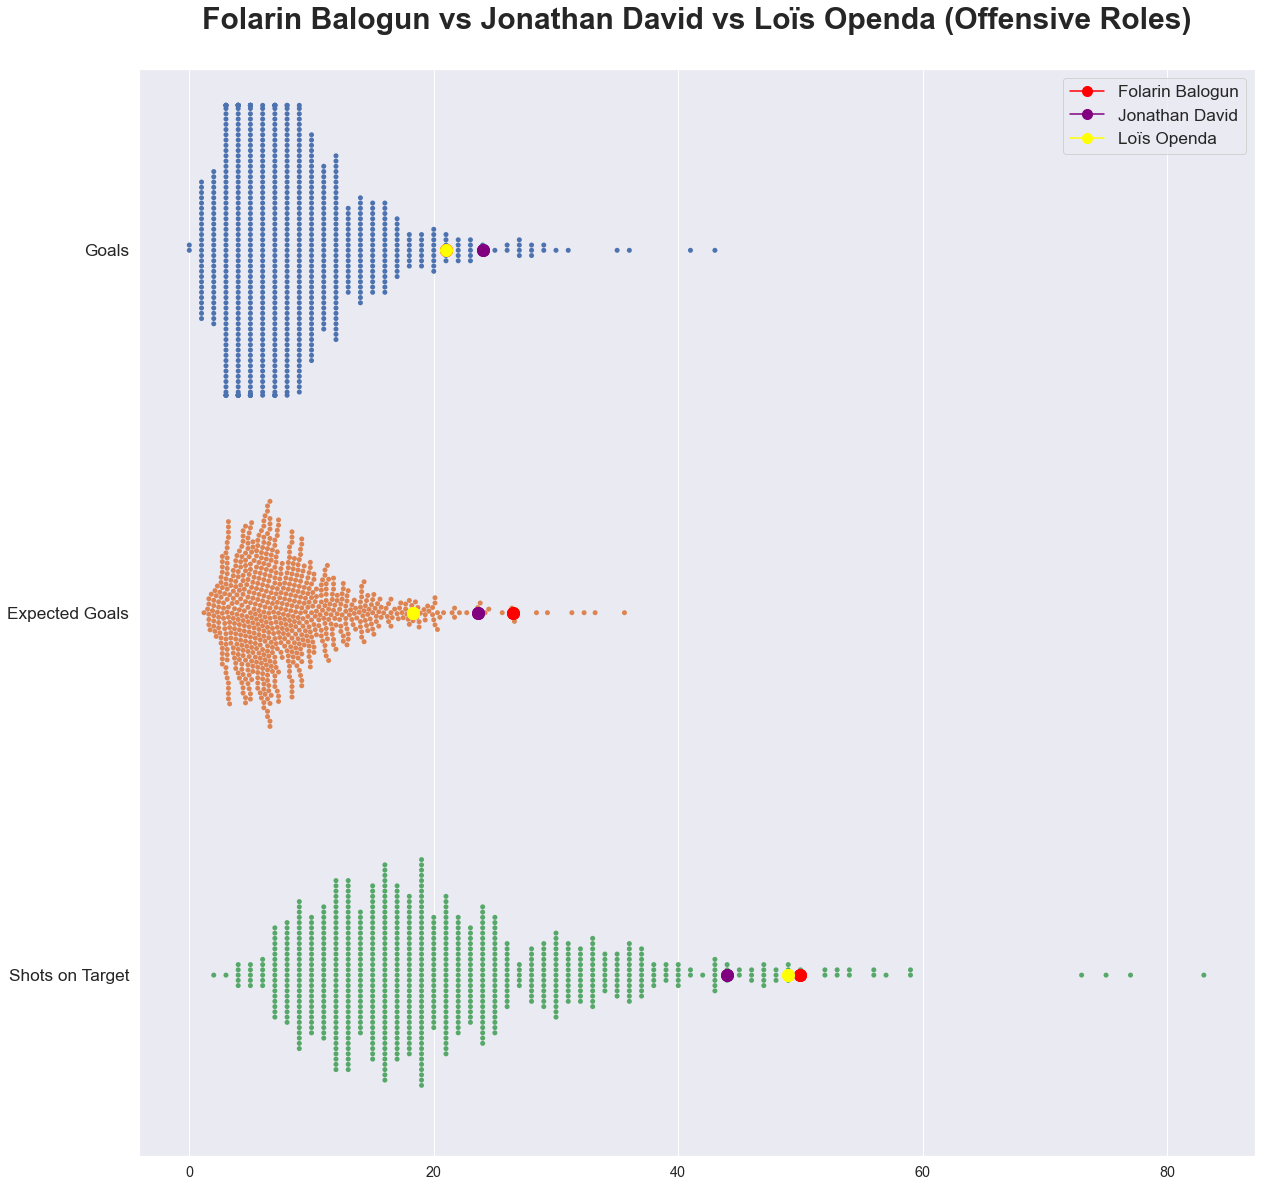

In [119]:
df_fw = df_eur[(df_eur['Pos'] == "FW") & (df_fw['90s'] > 12)]

dataset = {
    'Gls': df_fw["Gls"],
    'xG': df_fw["xG"],
    'SoT': df_fw["SoT"]
}


df = pd.DataFrame(dataset)

players = ["Folarin Balogun", "Jonathan David", "Loïs Openda"]
df_filtered = df_eur[df_eur['Player'].isin(players) & (df_eur['season'] == "2022-2023")]

df_melted = df.melt()

# Set the y-tick positions and labels
y_ticks = range(len(df_melted['variable'].unique()))
y_labels = ['Gls', 'xG', 'SoT']

ax = sns.swarmplot(data=df_melted, x="value", y="variable")
sns.set(rc={'figure.figsize':(20,20)})
# Add marking points to the specified players
for i in range(len(df_filtered)):
    player = df_filtered.iloc[i]['Player']
    for variable in y_labels:
        value = df_filtered.iloc[i][variable]
        if player == "Folarin Balogun":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='red', zorder=10)
        elif player == "Jonathan David":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='purple', zorder=10)
        elif player == "Loïs Openda":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='yellow', zorder=10)

# Set the y-tick positions and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(['Goals', 'Expected Goals', 'Shots on Target'], size="x-large")

# Set the size of x-axis tick labels
plt.xticks(fontsize='large')

# Remove the x-axis and y-axis titles
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Folarin Balogun vs Jonathan David vs Loïs Openda (Offensive Roles)', size="30", weight="bold", pad="40")

# Create a customized legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='red', markersize=10, label='Folarin Balogun'),
    plt.Line2D([0], [0], marker='o', color='purple', markersize=10, label='Jonathan David'),
    plt.Line2D([0], [0], marker='o', color='yellow', markersize=10, label='Loïs Openda')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize='x-large')



plt.show()


- Second we are going to do a comparaison between the three players concidering the midfield metrics :

<ipython-input-116-0cc65f5bad0d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Mid 3rd%"] =  (df_filtered["Mid 3rd"] * 100) / (df_filtered["Def 3rd"] + df_filtered["Att 3rd"] + df_filtered["Mid 3rd"])


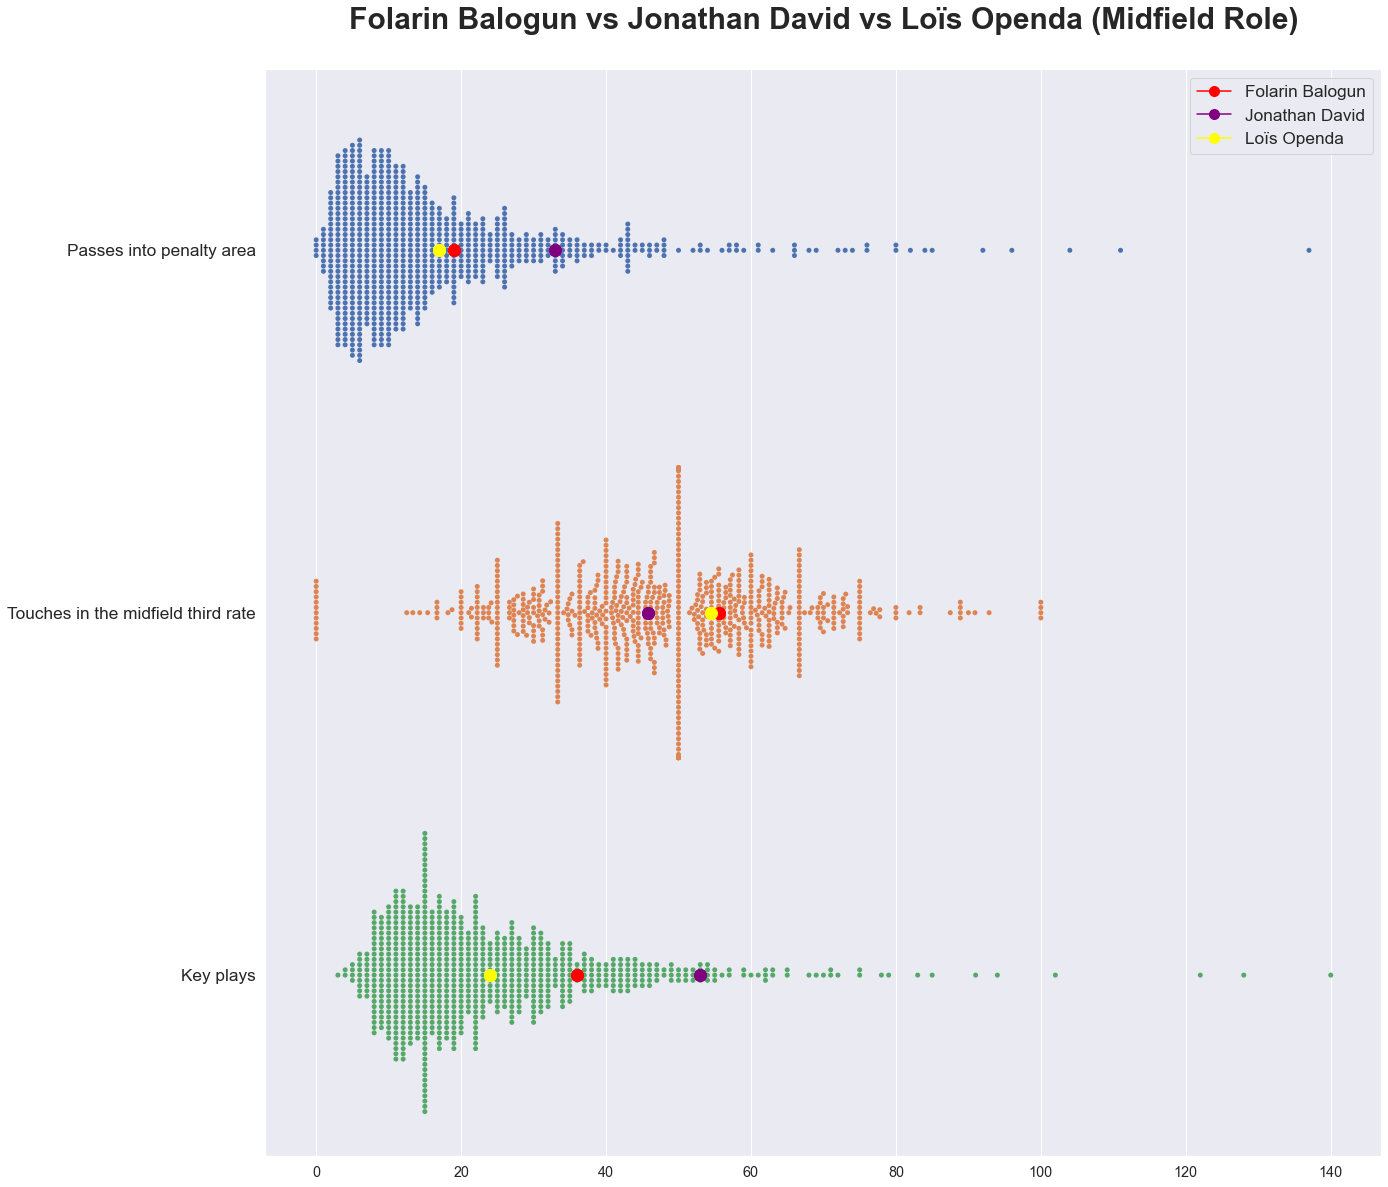

In [116]:
df_fw = df_eur[(df_eur['Pos'] == "FW") & (df_fw['90s'] > 12)]

dataset = {
    'PPA': df_fw["PPA"],
    'Mid 3rd%': (df_fw["Mid 3rd"] * 100) / (df_fw["Def 3rd"] + df_fw["Att 3rd"] + df_fw["Mid 3rd"]),
    'KP': df_fw["KP"]
}


df = pd.DataFrame(dataset)

players = ["Folarin Balogun", "Jonathan David", "Loïs Openda"]
df_filtered = df_eur[df_eur['Player'].isin(players) & (df_eur['season'] == "2022-2023")]
df_filtered["Mid 3rd%"] =  (df_filtered["Mid 3rd"] * 100) / (df_filtered["Def 3rd"] + df_filtered["Att 3rd"] + df_filtered["Mid 3rd"])
df_melted = df.melt()

# Set the y-tick positions and labels
y_ticks = range(len(df_melted['variable'].unique()))
y_labels = ['PPA', 'Mid 3rd%', 'KP']

ax = sns.swarmplot(data=df_melted, x="value", y="variable")
sns.set(rc={'figure.figsize':(20,20)})
# Add marking points to the specified players
for i in range(len(df_filtered)):
    player = df_filtered.iloc[i]['Player']
    for variable in y_labels:
        value = df_filtered.iloc[i][variable]
        if player == "Folarin Balogun":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='red', zorder=10)
        elif player == "Jonathan David":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='purple', zorder=10)
        elif player == "Loïs Openda":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='yellow', zorder=10)

# Set the y-tick positions and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(['Passes into penalty area', 'Touches in the midfield third rate', 'Key plays'], size="x-large")

# Set the size of x-axis tick labels
plt.xticks(fontsize='large')

# Remove the x-axis and y-axis titles
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Folarin Balogun vs Jonathan David vs Loïs Openda (Midfield Roles)', size="30", weight="bold", pad="40")

# Create a customized legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='red', markersize=10, label='Folarin Balogun'),
    plt.Line2D([0], [0], marker='o', color='purple', markersize=10, label='Jonathan David'),
    plt.Line2D([0], [0], marker='o', color='yellow', markersize=10, label='Loïs Openda')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize='x-large')



plt.show()


- Finally we are going to do a comparaison between the three players concidering the deffending metrics :

<ipython-input-118-9ea26664840c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Def 3rd%"] =  (df_filtered["Def 3rd"] * 100) / (df_filtered["Def 3rd"] + df_filtered["Att 3rd"] + df_filtered["Mid 3rd"])
C:\Users\pc\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


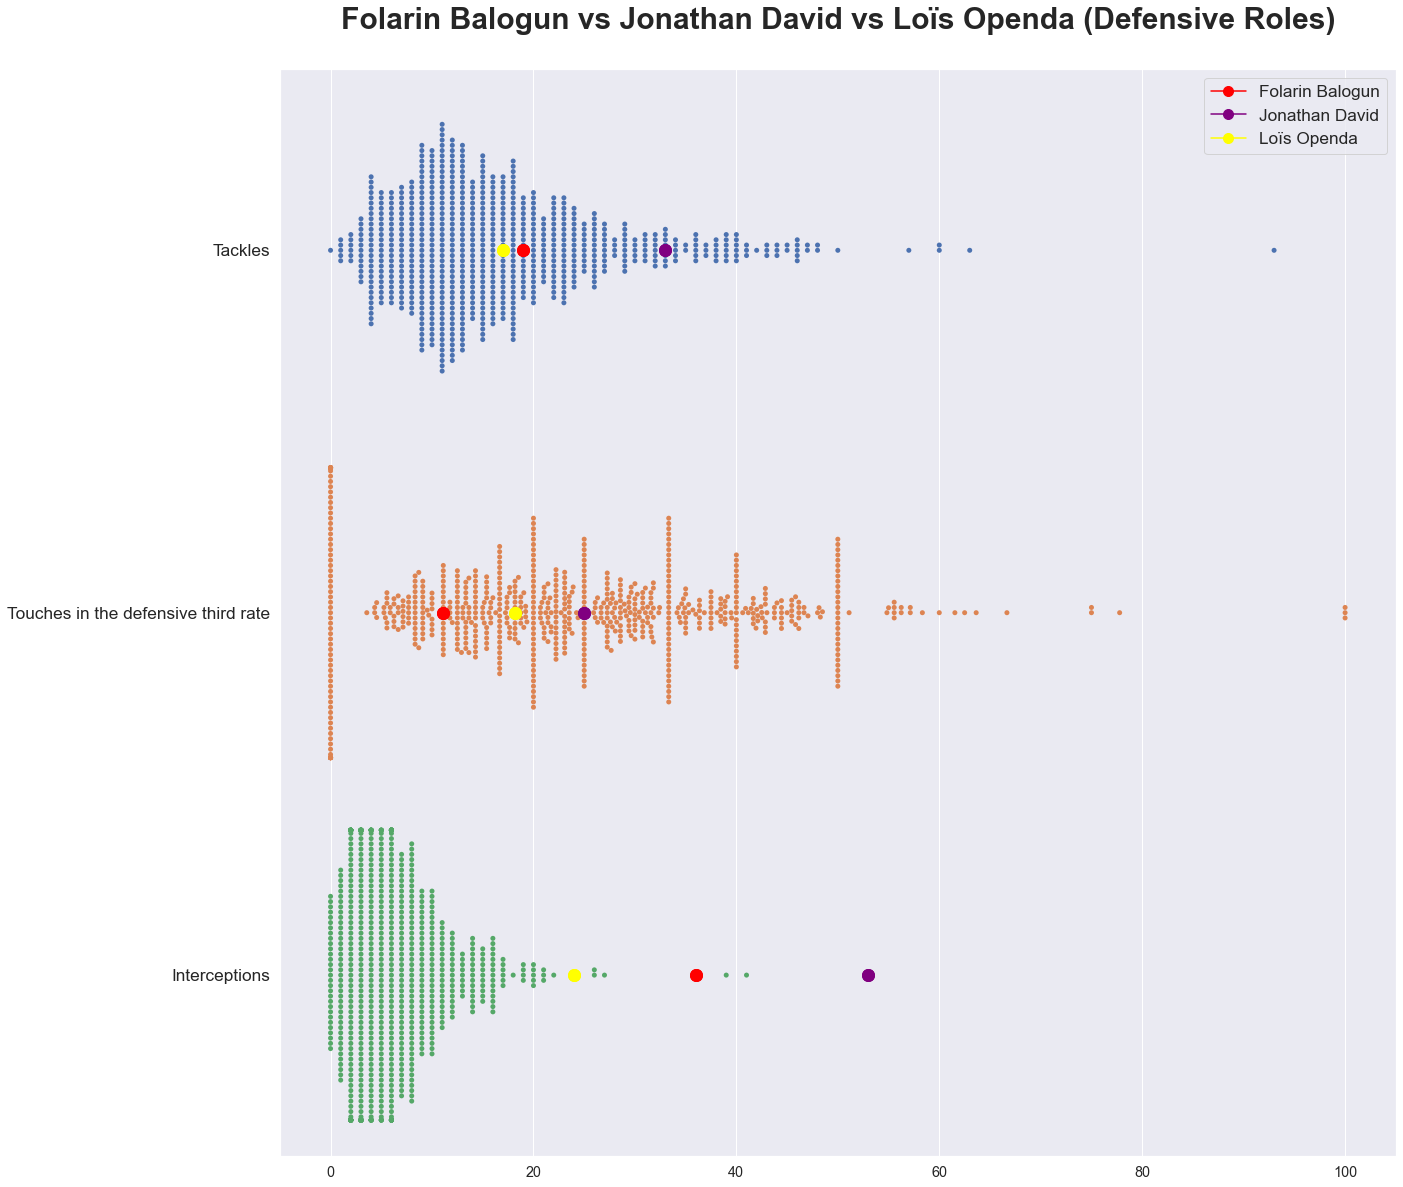

In [118]:
df_fw = df_eur[(df_eur['Pos'] == "FW") & (df_fw['90s'] > 12)]

dataset = {
    'Tkl': df_fw["Tkl"],
    'Def 3rd%': (df_fw["Def 3rd"] * 100) / (df_fw["Def 3rd"] + df_fw["Att 3rd"] + df_fw["Mid 3rd"]),
    'Int': df_fw["Int"]
}


df = pd.DataFrame(dataset)

players = ["Folarin Balogun", "Jonathan David", "Loïs Openda"]
df_filtered = df_eur[df_eur['Player'].isin(players) & (df_eur['season'] == "2022-2023")]
df_filtered["Def 3rd%"] =  (df_filtered["Def 3rd"] * 100) / (df_filtered["Def 3rd"] + df_filtered["Att 3rd"] + df_filtered["Mid 3rd"])
df_melted = df.melt()

# Set the y-tick positions and labels
y_ticks = range(len(df_melted['variable'].unique()))
y_labels = ['PPA', 'Def 3rd%', 'KP']

ax = sns.swarmplot(data=df_melted, x="value", y="variable")
sns.set(rc={'figure.figsize':(20,20)})
# Add marking points to the specified players
for i in range(len(df_filtered)):
    player = df_filtered.iloc[i]['Player']
    for variable in y_labels:
        value = df_filtered.iloc[i][variable]
        if player == "Folarin Balogun":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='red', zorder=10)
        elif player == "Jonathan David":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='purple', zorder=10)
        elif player == "Loïs Openda":
            ax.plot(value, y_ticks[y_labels.index(variable)], marker='o', markersize=12, color='yellow', zorder=10)

# Set the y-tick positions and labels
ax.set_yticks(y_ticks)
ax.set_yticklabels(['Tackles', 'Touches in the defensive third rate', 'Interceptions'], size="x-large")

# Set the size of x-axis tick labels
plt.xticks(fontsize='large')

# Remove the x-axis and y-axis titles
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Folarin Balogun vs Jonathan David vs Loïs Openda (Defensive Roles)', size="30", weight="bold", pad="40")

# Create a customized legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='red', markersize=10, label='Folarin Balogun'),
    plt.Line2D([0], [0], marker='o', color='purple', markersize=10, label='Jonathan David'),
    plt.Line2D([0], [0], marker='o', color='yellow', markersize=10, label='Loïs Openda')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize='x-large')



plt.show()


### Performance evaluation of Brighton midfielders in comparison to other Premier League midfielders.

- First thing we need to do is to group the midfield players of each teams in the premier league concidering the ball progression metrics : 

In [136]:
df_mids = df_eur[(df_eur['Pos'] == "MF") | (df_eur['Pos'].str[:2] == "MF")]

df_mids = df_mids[df_eur['90s'] > 12]
#df_mids
df_grouped = df_mids.groupby(['Squad', 'season']).agg({
    'Cmp%': 'sum',
    '1/3': 'sum',
    'Mid 3rd': 'sum',
    'Att 3rd': 'sum',
    'Def 3rd': 'sum',
    'PrgP': 'sum',
    'Gls': 'sum',
    'Sh': 'sum',
    'Ast': 'sum',
    'KP': 'sum',
    'Int': 'sum',
    'Tkl': 'sum',
    'Blocks': 'sum'
    
    # Add other performance metrics you want to aggregate
})

premier_league_teams = [
    "Arsenal",
    "Aston Villa",
    "Brentford",
    "Brighton",
    "Nott'ham Forest",
    "Chelsea",
    "Crystal Palace",
    "Everton",
    "Leeds United",
    "Leicester City",
    "Liverpool",
    "Manchester City",
    "Manchester Utd",
    "Newcastle Utd",
    "Fulham",
    "Southampton",
    "Tottenham",
    "Bournemouth",
    "West Ham",
    "Wolves"
]


df_grouped = df_grouped[
    (df_grouped.index.get_level_values('season') == '2022-2023') &
    (df_grouped.index.get_level_values('Squad').isin(premier_league_teams))
]

df_grouped

<ipython-input-136-176bef16e3c3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_mids = df_mids[df_eur['90s'] > 12]


,,Cmp%,1/3,Mid 3rd,Att 3rd,Def 3rd,PrgP,Gls,Sh,Ast,KP,Int,Tkl,Blocks
Squad,season,,,,,,,,,,,,,
Arsenal,2022-2023,252.2,514.0,67.0,30.0,43.0,693.0,25,161,14,149.0,49,140.0,74.0
Aston Villa,2022-2023,404.7,449.0,139.0,53.0,126.0,608.0,18,162,19,153.0,126,318.0,185.0
Bournemouth,2022-2023,524.8,351.0,127.0,30.0,118.0,484.0,22,197,12,147.0,159,275.0,200.0
Brentford,2022-2023,303.6,295.0,89.0,30.0,75.0,358.0,13,74,12,88.0,100,194.0,137.0
Brighton,2022-2023,254.6,489.0,114.0,29.0,86.0,648.0,20,147,11,170.0,91,229.0,101.0
Chelsea,2022-2023,501.0,609.0,94.0,39.0,94.0,694.0,9,116,8,117.0,99,227.0,140.0
Crystal Palace,2022-2023,235.5,257.0,80.0,20.0,85.0,369.0,13,134,8,101.0,92,185.0,108.0
Everton,2022-2023,320.5,351.0,120.0,30.0,119.0,409.0,8,111,12,120.0,131,269.0,142.0
Fulham,2022-2023,225.2,286.0,92.0,39.0,78.0,324.0,10,120,10,102.0,71,209.0,123.0


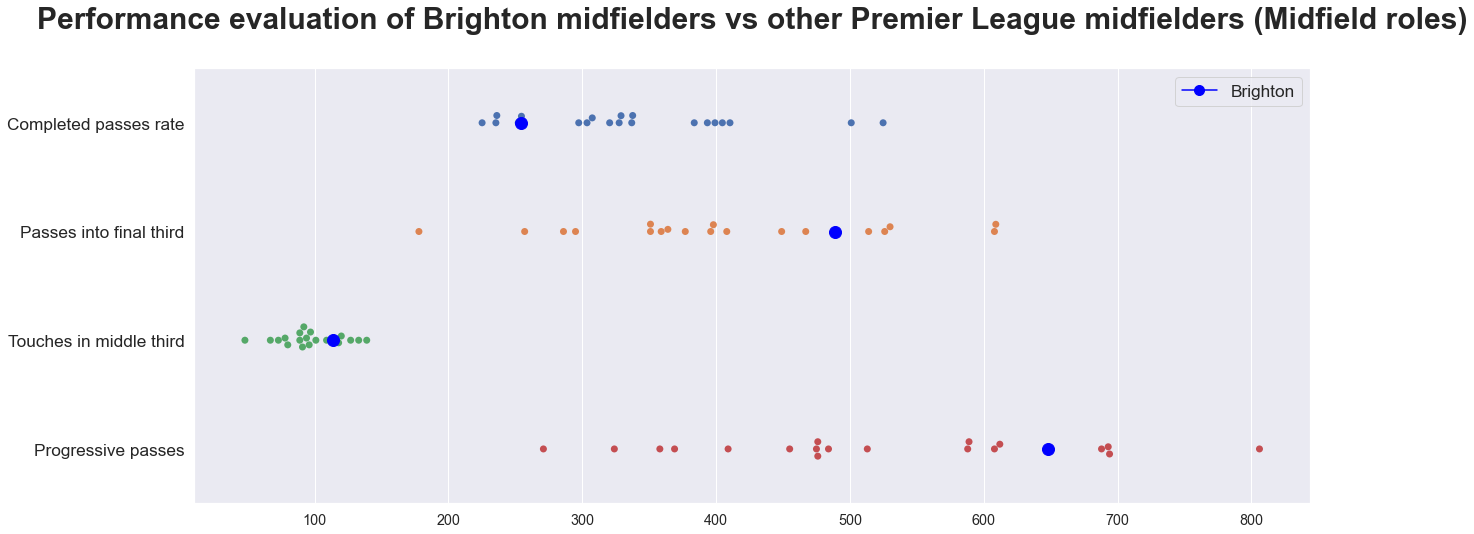

In [133]:
df_grouped_mid = pd.DataFrame({
    'Cmp%': df_grouped["Cmp%"],
    '1/3': df_grouped["1/3"],
    'Mid 3rd': df_grouped["Mid 3rd"],
    'PrgP': df_grouped["PrgP"]
})
ax = sns.swarmplot(data=df_grouped_mid.melt(), x="value", y="variable", s=7)
sns.set(rc={'figure.figsize':(20,8)})
# Mark the point representing "Brighton" with a marker
brighton_row = df_grouped.loc["Brighton"].copy()
brighton_row["name"] = "Brighton"

y_labels_mids = ['Cmp%', '1/3', 'Mid 3rd', 'PrgP']
for idx, label in enumerate(y_labels_mids):
    value = brighton_row[label]
    ax.plot(value, idx, marker='o', markersize=12, color='blue', zorder=10)
    
ax.set_yticklabels(['Completed passes rate', 'Passes into final third', 'Touches in middle third', 'Progressive passes'], size="x-large")
    
# Set the size of x-axis tick labels
plt.xticks(fontsize='large')

# Remove the x-axis and y-axis titles
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Performance evaluation of Brighton midfielders vs other Premier League midfielders (Midfield roles)', size="30", weight="bold", pad="40")

# Create a customized legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='blue', markersize=10, label='Brighton'),
]
plt.legend(handles=legend_elements, loc='upper right', fontsize='x-large')

plt.show()


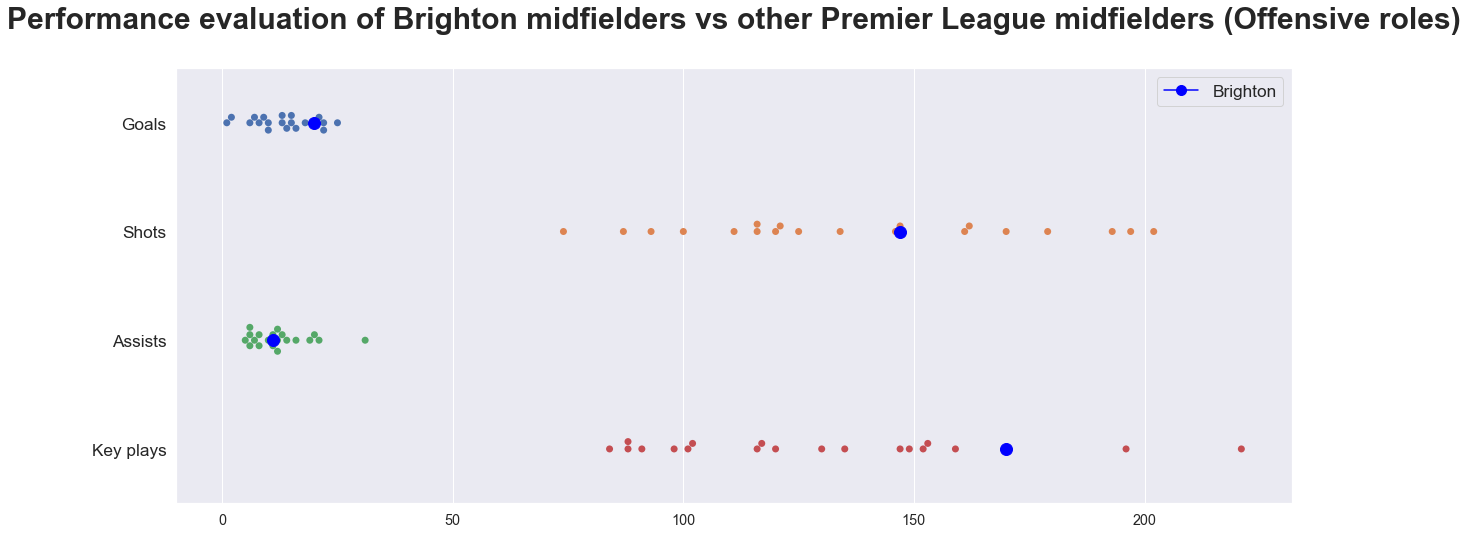

In [138]:
df_grouped_mid = pd.DataFrame({
    'Gls': df_grouped["Gls"],
    'Sh': df_grouped["Sh"],
    'Ast': df_grouped["Ast"],
    'KP': df_grouped["KP"]
})
ax = sns.swarmplot(data=df_grouped_mid.melt(), x="value", y="variable", s=7)
sns.set(rc={'figure.figsize':(20,8)})
# Mark the point representing "Brighton" with a marker
brighton_row = df_grouped.loc["Brighton"].copy()
brighton_row["name"] = "Brighton"

y_labels_mids = ['Gls', 'Sh', 'Ast', 'KP']
for idx, label in enumerate(y_labels_mids):
    value = brighton_row[label]
    ax.plot(value, idx, marker='o', markersize=12, color='blue', zorder=10)
    
ax.set_yticklabels(['Goals', 'Shots', 'Assists', 'Key plays'], size="x-large")
    
# Set the size of x-axis tick labels
plt.xticks(fontsize='large')

# Remove the x-axis and y-axis titles
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Performance evaluation of Brighton midfielders vs other Premier League midfielders (Offensive roles)', size="30", weight="bold", pad="40")

# Create a customized legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='blue', markersize=10, label='Brighton'),
]
plt.legend(handles=legend_elements, loc='upper right', fontsize='x-large')

plt.show()


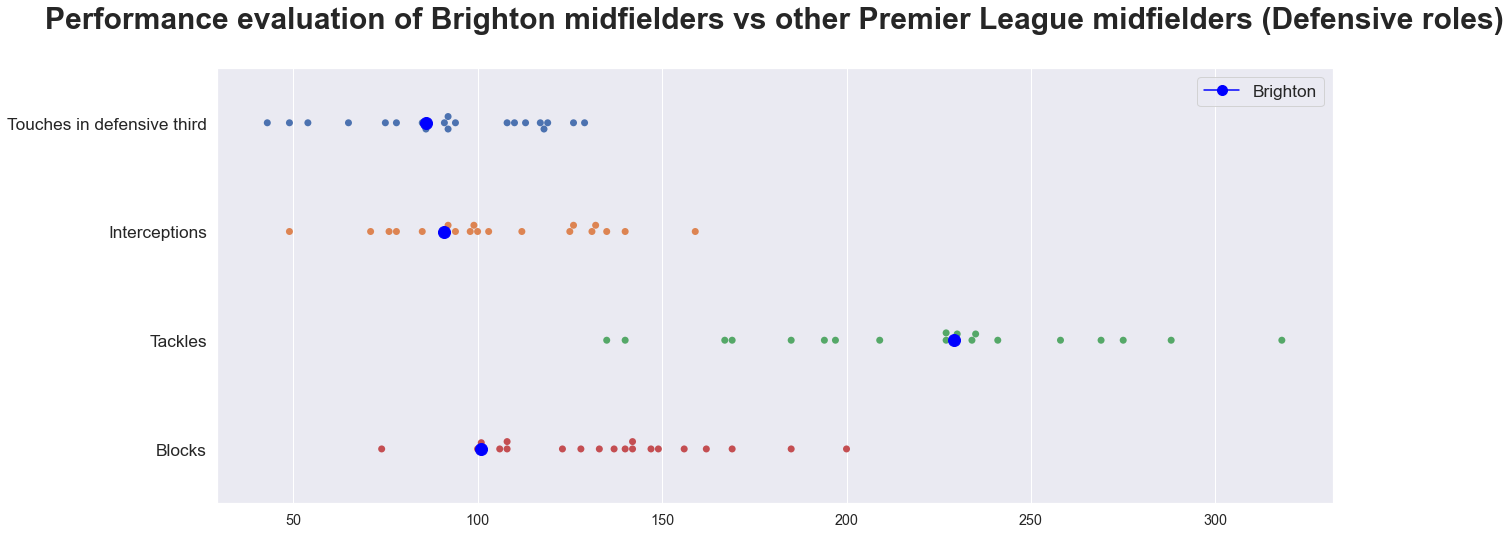

In [143]:
df_grouped_mid = pd.DataFrame({
    'Def 3rd': df_grouped["Def 3rd"],
    'Int': df_grouped["Int"],
    'Tkl': df_grouped["Tkl"],
    'Blocks': df_grouped["Blocks"]
})
ax = sns.swarmplot(data=df_grouped_mid.melt(), x="value", y="variable", s=7)
sns.set(rc={'figure.figsize':(20,8)})
# Mark the point representing "Brighton" with a marker
brighton_row = df_grouped.loc["Brighton"].copy()
brighton_row["name"] = "Brighton"

y_labels_mids = ['Def 3rd', 'Int', 'Tkl', 'Blocks']
for idx, label in enumerate(y_labels_mids):
    value = brighton_row[label]
    ax.plot(value, idx, marker='o', markersize=12, color='blue', zorder=10)
    
ax.set_yticklabels(['Touches in defensive third', 'Interceptions', 'Tackles', 'Blocks'], size="x-large")
    
# Set the size of x-axis tick labels
plt.xticks(fontsize='large')

# Remove the x-axis and y-axis titles
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Performance evaluation of Brighton midfielders vs other Premier League midfielders (Defensive roles)', size="30", weight="bold", pad="40")

# Create a customized legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='blue', markersize=10, label='Brighton'),
]
plt.legend(handles=legend_elements, loc='upper right', fontsize='x-large')

plt.show()
